### Building a Pair Plot

This activity introduces an approach for building a pairplot.  First, the `seaborn` library is used to build pairplots.  Then, after introducing these you will explore a sample dataset to explore relationships between numeric features. 

### Seaborn: `sns.pairplot()`

Below a dataset made available by Dr. Kristen Gorman from the Palmer Station, Antarctica LTER. [more info](https://github.com/allisonhorst/palmerpenguins)  The data contain anatomical measurements of three different species of penguins from three islands on the Palmer Archipelago in Antarctica.  We will use this data to create a basic pairplot which is a grid of scatterplots comparing all quantitative features.  On the main diagonal, a histogram of each feature is drawn.  

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
data = sns.load_dataset('penguins')

In [140]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [177]:
data.loc[data['species'] == 'Gentoo',['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,9.497845,1.945580,13.213834,1039.626150
bill_depth_mm,1.945580,0.962792,4.495995,355.694556
flipper_length_mm,13.213834,4.495995,42.054911,2297.144476
body_mass_g,1039.626150,355.694556,2297.144476,254133.180061


In [141]:
data.groupby('species')['bill_length_mm'].count()

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: bill_length_mm, dtype: int64

In [142]:
data.groupby('species')['bill_length_mm'].max()

species
Adelie       46.0
Chinstrap    58.0
Gentoo       59.6
Name: bill_length_mm, dtype: float64

In [143]:
data.groupby('species')['bill_depth_mm'].max()

species
Adelie       21.5
Chinstrap    20.8
Gentoo       17.3
Name: bill_depth_mm, dtype: float64

In [144]:
data.groupby('species')['flipper_length_mm'].max()

species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64

In [145]:
data.groupby('species')['body_mass_g'].max()

species
Adelie       4775.0
Chinstrap    4800.0
Gentoo       6300.0
Name: body_mass_g, dtype: float64

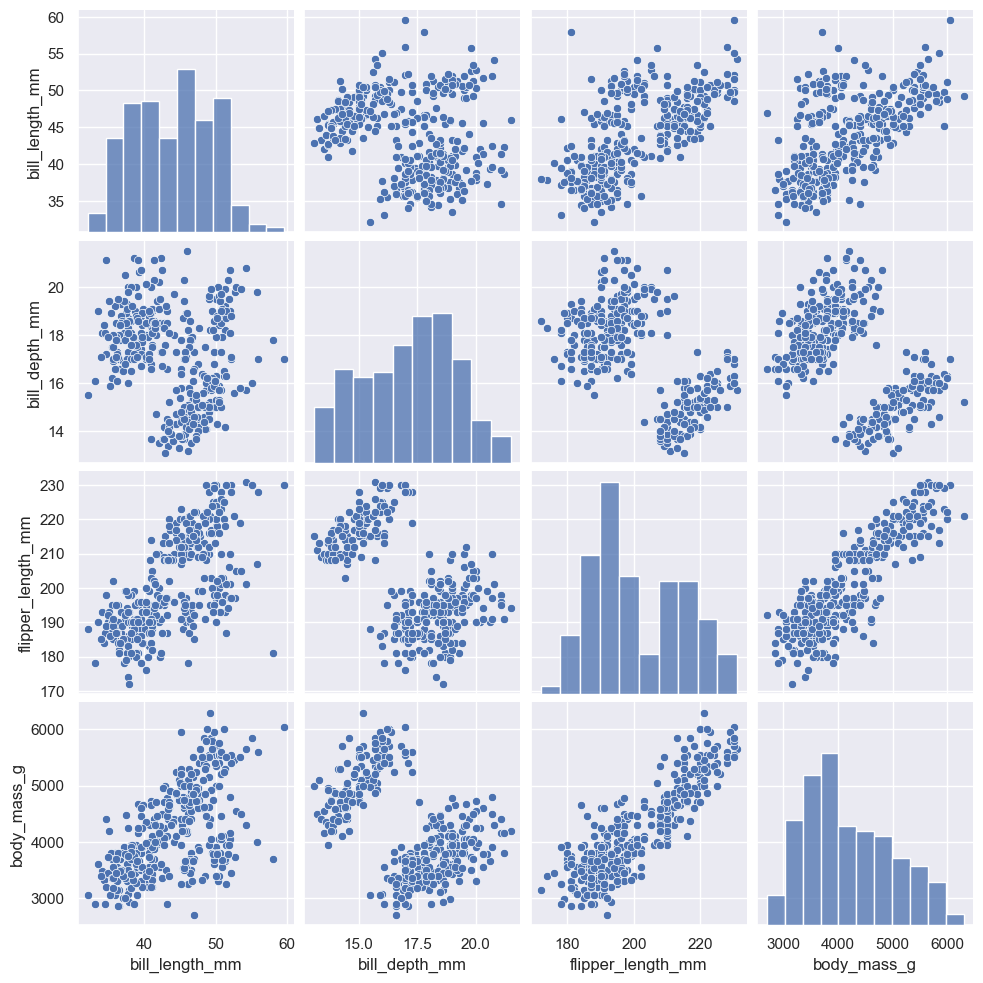

In [146]:
sns.pairplot(data);

#### Including Categorical Features

To label the points by a categorical feature in the data, the `hue` argument is used to specify a column to color by.  For example, setting `hue = species` will color the points by `species` and include a legend relating the color to the label. Note that the diagonal plot changes to a `kde`.  

Text(0.5, 1.0, 'Sex')

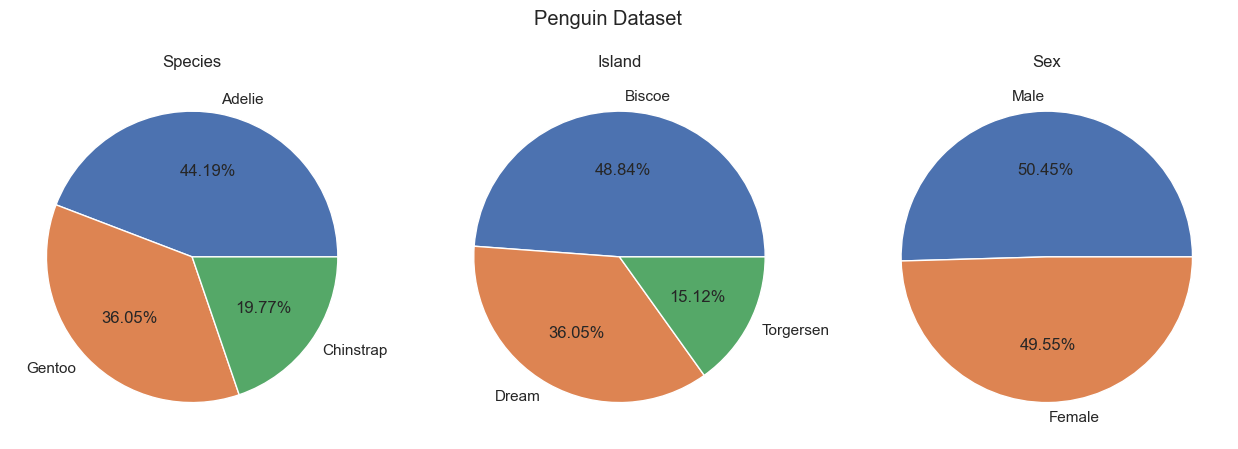

In [172]:
fig, ax = plt.subplots(1,3, figsize=(13,5))
plt.suptitle('Penguin Dataset')
fig.tight_layout()
#sns.set()
df_s=data['species'].value_counts().rename_axis('sub_species_value').reset_index(name='counts')
s_labels = df_s.sub_species_value
s_values = df_s.counts
ax[0].pie(s_values,labels = s_labels, autopct="%.2f%%")
ax[0].set_title('Species')
df_i=data['island'].value_counts().rename_axis('sub_island_value').reset_index(name='counts')
i_labels = df_i.sub_island_value
i_values = df_i.counts
ax[1].pie(i_values,labels = i_labels, autopct="%.2f%%" )
ax[1].set_title('Island')
df_x=data['sex'].value_counts().rename_axis('sub_sex_value').reset_index(name='counts')
x_labels = df_x.sub_sex_value
x_values = df_x.counts
ax[2].pie(x_values,labels = x_labels,autopct="%.2f%%")
ax[2].set_title('Sex')

In [169]:
data['species'].value_counts().rename_axis('sub_species_value').reset_index(name='counts')

,sub_species_value,counts
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [148]:
data.loc[:,['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [149]:
penguins_corr = data.loc[:, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
penguins_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [150]:
penguins_cov = data.loc[:, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].cov()
penguins_cov

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


Text(0.5, 1.0, 'Covariance Matrix')

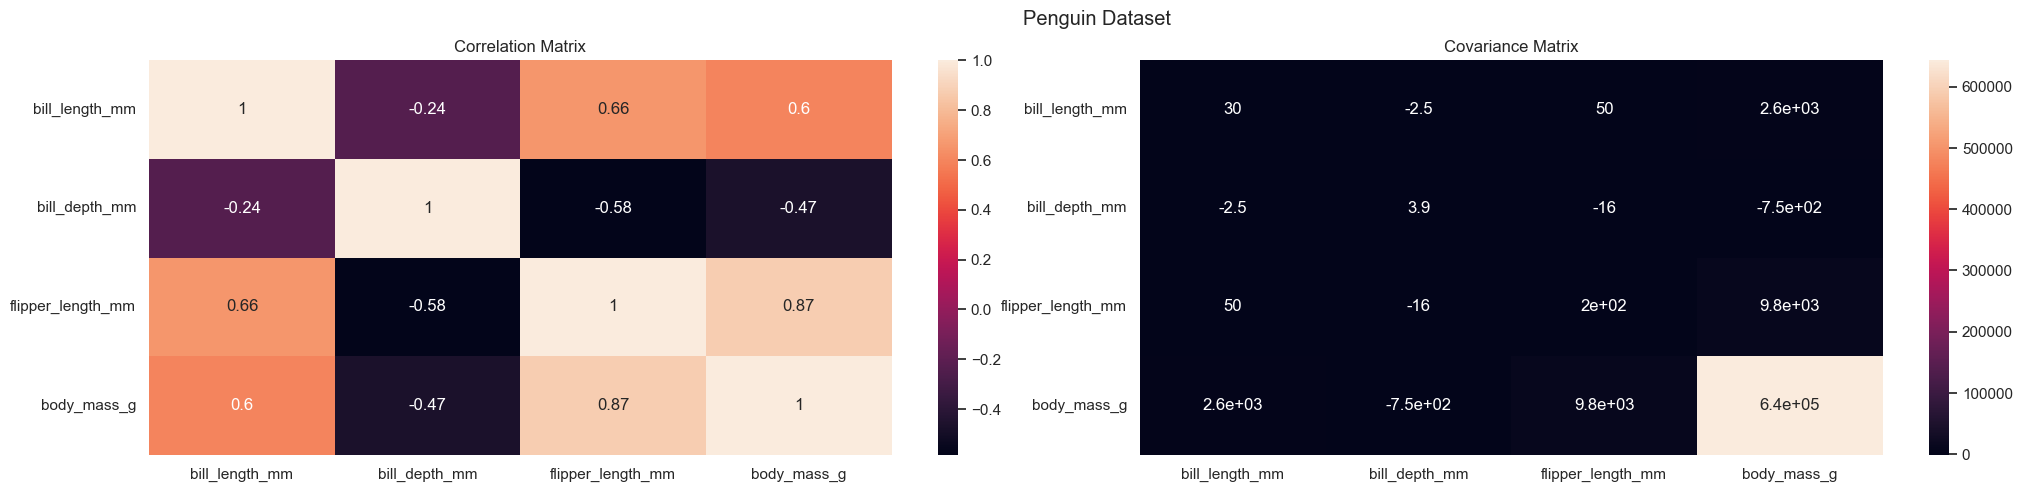

In [151]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plt.suptitle('Penguin Dataset')
fig.tight_layout()
sns.heatmap(penguins_corr, annot=True, ax=ax[0])
ax[0].set_title('Correlation Matrix')
sns.heatmap(penguins_cov, annot=True, ax=ax[1])
ax[1].set_title('Covariance Matrix')

In [152]:
data['body_mass_g'].max(), data['body_mass_g'].min()

(6300.0, 2700.0)

In [153]:
data['bill_depth_mm'].max(), data['bill_depth_mm'].min()

(21.5, 13.1)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

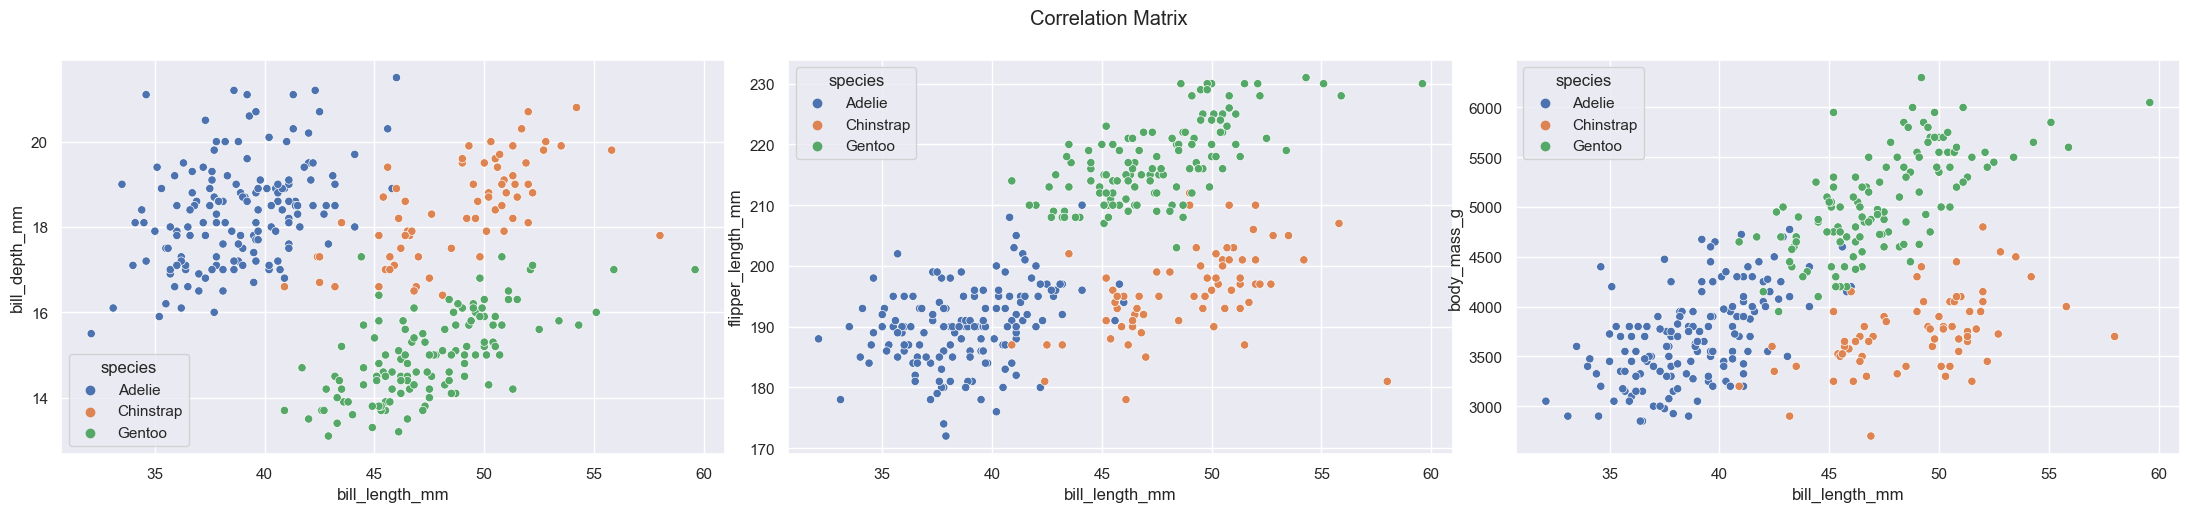

In [154]:
fig, ax = plt.subplots(1,3, figsize=(22,5))
fig.tight_layout()
plt.suptitle('Correlation Matrix')
sns.set()
fig.tight_layout()
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=data, hue="species", ax=ax[0])
#ax[0].set_title('Correlation Matrix')
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=data, hue="species", ax=ax[1])
#ax[1].set_title('Correlation Matrix')
sns.scatterplot(x="bill_length_mm", y="body_mass_g", data=data, hue="species", ax=ax[2])
#ax[2].set_title('Correlation Matrix')

In [155]:
penguins_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


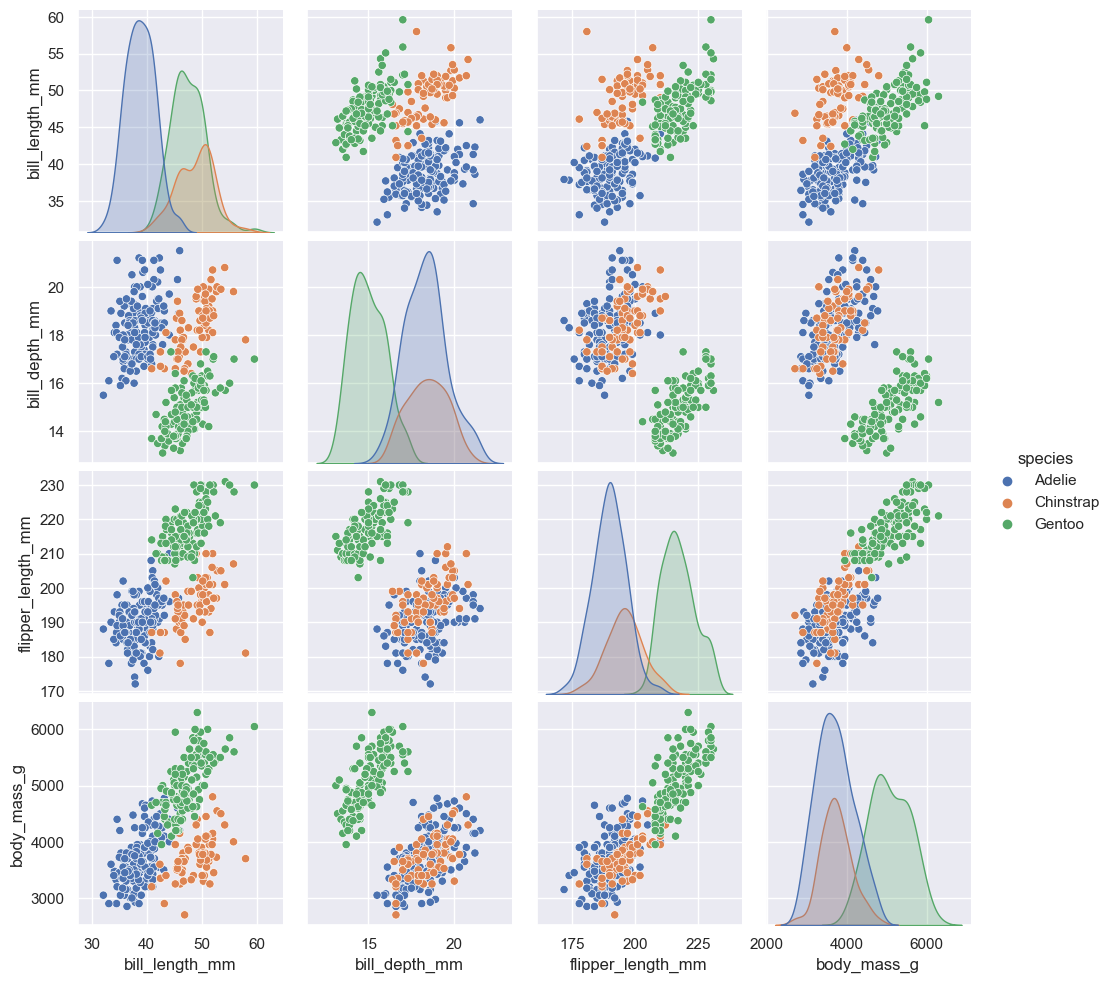

In [156]:
sns.pairplot(data, hue = "species")

There are many additional options available that control elements such as the kind of plot on the diagonal, color palette, and even changing the plot types off the main diagonal to be different plots.  For a deeper dive into the `.Pairgrid` see the documentation [here](https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships).

### Example: Automotive Data

Below we load a small dataset containing 32 observations on 10 automotive cars.  The features are:

```
mpg     Miles/(US) gallon
cyl     Number of cylinders
disp     Displacement (cu.in.)
hp     Gross horsepower
drat     Rear axle ratio
wt     Weight (1000 lbs)
qsec     1/4 mile time
vs     Engine (0 = V-shaped, 1 = straight)
am     Transmission (0 = automatic, 1 = manual)
gear     Number of forward gears
carb     Number of carburetors
```

In [157]:
import pandas as pd

In [158]:
df = pd.read_csv('data/cars.csv')

In [159]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Below, we create a dataframe considering the numeric features:

```python
['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
```

and add a single categorical feature `vs`.  Your task is to use a `sns.pairplot()` to explore the relationships between features and which are capable of separating the categorical features:

```python
'vs', 'am', 'gear', 'carb', 'cyl'
```

Report back on your findings, specifically what relationships you are able to uncover using the pairplot on the auto data.

In [160]:
#create a DataFrame from floats
#and add a categorical feature "vs"
s1 = pd.concat((df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']], df[['vs']]), axis = 1)

In [161]:
s1.head()

,mpg,disp,hp,drat,wt,qsec,vs
0,21.0,160.0,110,3.90,2.620,16.46,0
1,21.0,160.0,110,3.90,2.875,17.02,0
2,22.8,108.0,93,3.85,2.320,18.61,1
3,21.4,258.0,110,3.08,3.215,19.44,1
4,18.7,360.0,175,3.15,3.440,17.02,0


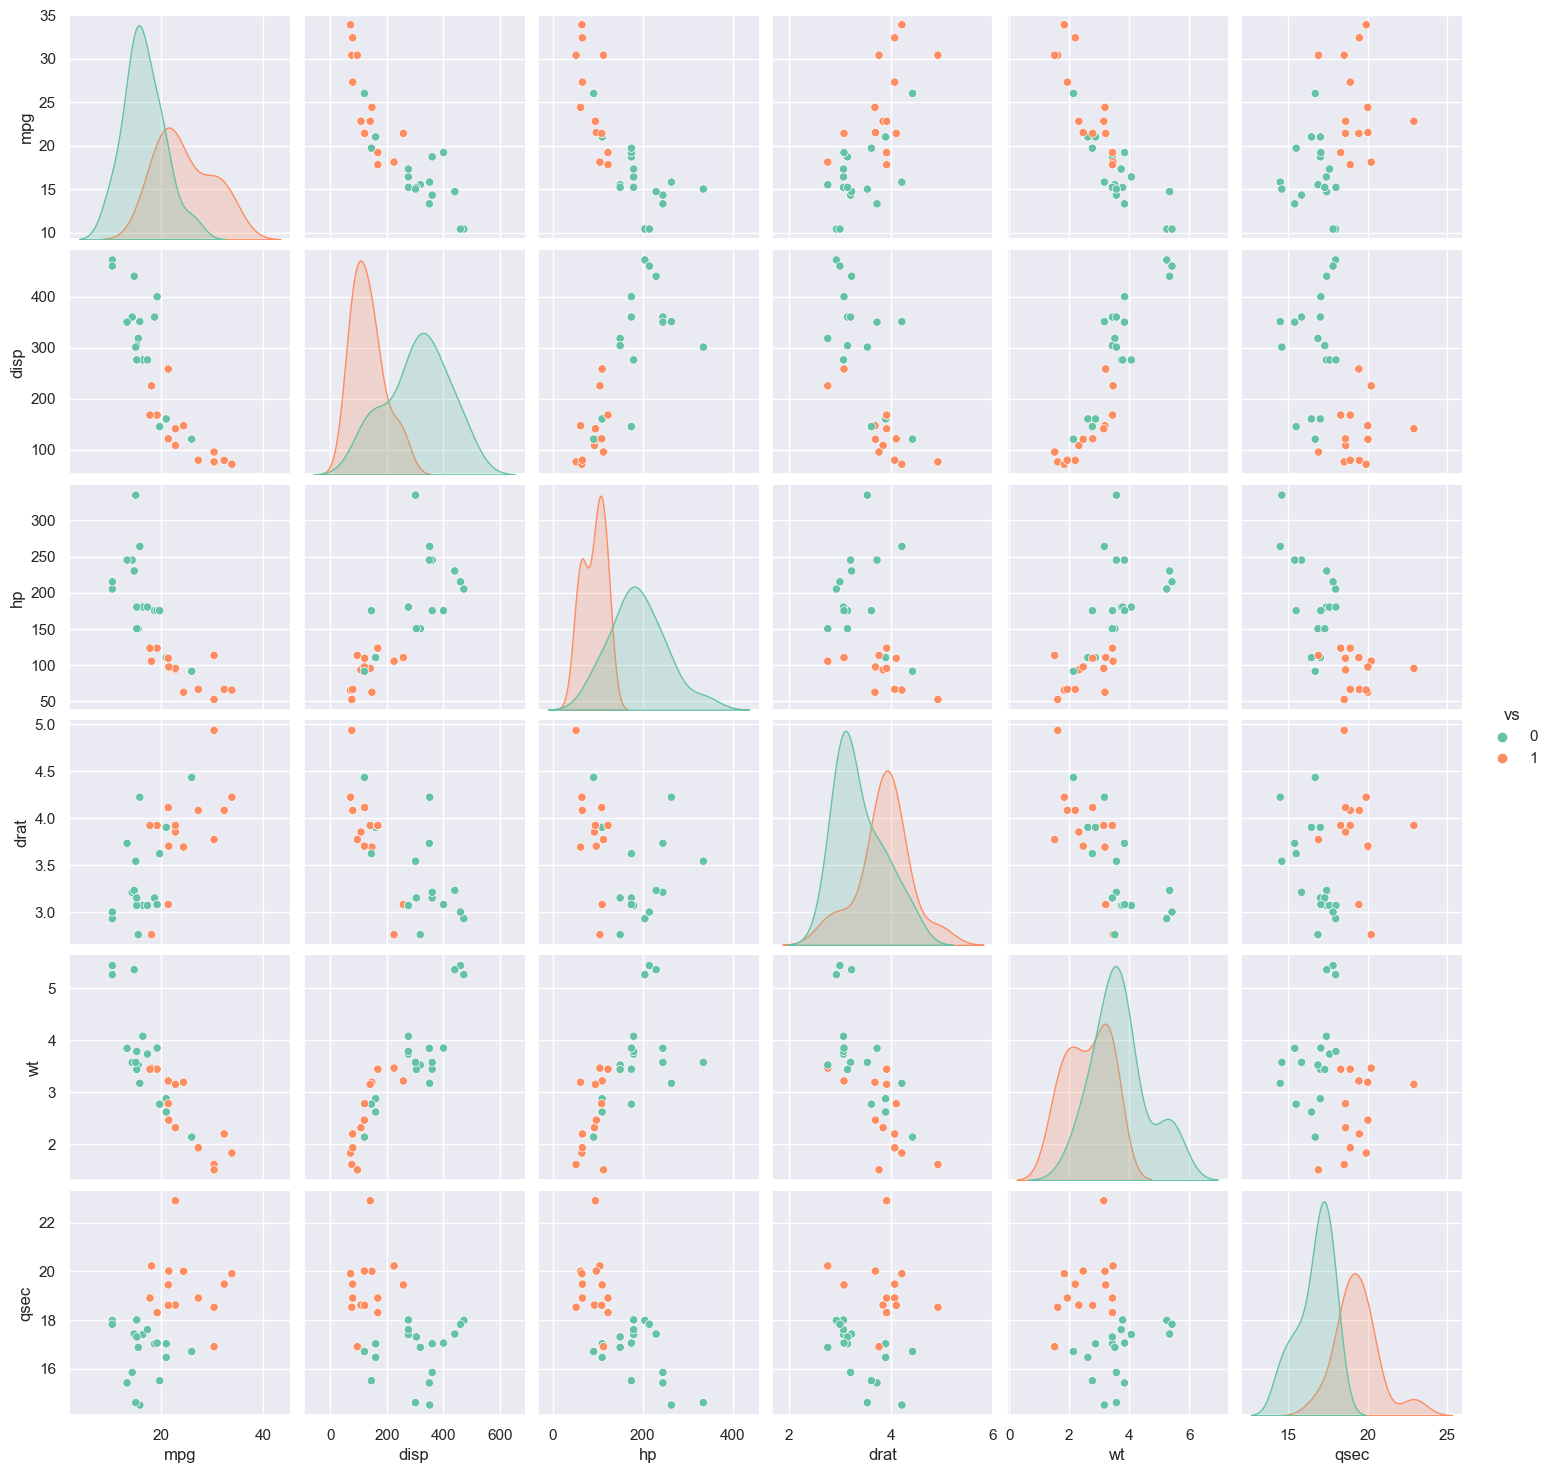

In [162]:
sns.pairplot(s1, hue = 'vs', palette = "Set2")

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB
